In [3]:
import pandas as pd 
import numpy as np 

from matplotlib import pyplot as plt
import seaborn as sns 

### Exploratory data analys 

In [4]:
df = pd.read_csv('housing.csv')

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
df.index

RangeIndex(start=0, stop=20640, step=1)

In [7]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [8]:
df.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
df.ocean_proximity = df.ocean_proximity.str.lower().str.replace(' ','_')

In [10]:
df[['housing_median_age','population','median_income','total_rooms']]

,housing_median_age,population,median_income,total_rooms
0,41.0,322.0,8.3252,880.0
1,21.0,2401.0,8.3014,7099.0
2,52.0,496.0,7.2574,1467.0
3,52.0,558.0,5.6431,1274.0
4,52.0,565.0,3.8462,1627.0
...,...,...,...,...
20635,25.0,845.0,1.5603,1665.0
20636,18.0,356.0,2.5568,697.0
20637,17.0,1007.0,1.7000,2254.0
20638,18.0,741.0,1.8672,1860.0


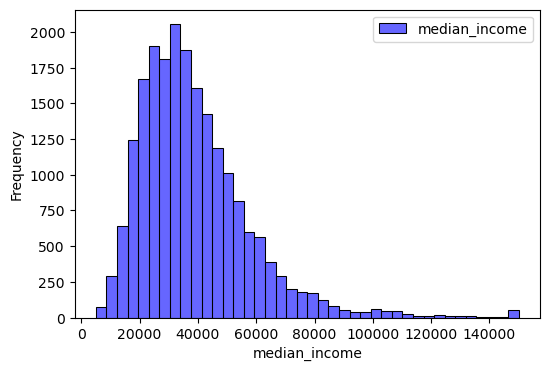

In [11]:
plt.figure(figsize=(6, 4))

median_income = df.median_income * 10000
sns.histplot(median_income, label='median_income', color='blue', alpha=0.6, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('median_income')


plt.show()

In [12]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Validation Framework - Splitting Data

In [13]:
len(df)

20640

In [14]:
np.random.seed(2)

n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n) # array from 1 to n ( number or rows ) 
np.random.shuffle(idx) # shuffling the positiion of the elements inside the array 
df_shuffled = df.iloc[idx] # shuffling rows inside df

#splitting data into 60%, 20% and 20% portion
df_train = df_shuffled.iloc[:n_train].copy() # iloc[start:stop]
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

### Linear regression

In [15]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0]) # X.shape returns a tupe ( num rows , num of columns ) X.shape[0] returns num of rowsand then creates array of ones of that size
    X = np.column_stack([ones, X]) # column_stack expect a list of arrays. ones will be stacked as first column

    XTX = X.T.dot(X) # computer X Transpose multiplied by X ( Gram Matrix ) 
    XTX_inv = np.linalg.inv(XTX) # Get inverse of gram Matrix
    w = XTX_inv.dot(X.T).dot(y) # return vector w that contains bias term w0 and rest of the weigts
    
    return w[0], w[1:]

### Baseline solution

In [67]:
base_  = ['housing_median_age','longitude_per_income','latitude_per_income','population_per_age','bedrooms_per_age','rooms_per_age','rooms_per_income','housing_age_per_income','bedrooms_per_room_per_income','population','median_income','population_per_income','longitude','latitude','population_per_household','bedrooms_per_room','rooms_per_household']

In [83]:
base  = ['median_income','total_bedrooms','total_rooms']

In [65]:
def prepare_X_(df):
    
    
    df = df.copy()
    features = base.copy()
    

    df['population_per_household'] = (df['population'] / df['households']).round(2)
    df['bedrooms_per_room'] = (df['total_bedrooms'] / df['total_rooms']).round(2)
    df['rooms_per_household'] = (df['total_rooms'] / df['households']).round(2)

    df['housing_age_per_income'] = (df['housing_median_age'] / df['median_income']).round(2)
    df['rooms_per_income'] = (df['rooms_per_household'] / df['median_income']).round(2)
    df['bedrooms_per_room_per_income'] = (df['bedrooms_per_room'] / df['median_income']).round(2)
    df['population_per_income'] = (df['population'] / df['median_income']).round(2)
    df['longitude_per_income'] = (df['longitude'] / df['median_income']).round(2)
    df['latitude_per_income'] = (df['latitude'] / df['median_income']).round(2)
    
    df['bedrooms_per_age'] = (df['total_bedrooms'] / df['housing_median_age']).round(2)
    df['rooms_per_age'] = (df['total_rooms'] / df['housing_median_age']).round(2)
    df['population_per_age'] = (df['population'] / df['housing_median_age']).round(2)

    
    #df['median_income'] = df.median_income * 10000

    
    
    for v in ['<1h_ocean', 'inland', 'near_ocean', 'near_bay']:
        feature = 'is_ocean_proximity_%s' % v
        df[feature] = (df['ocean_proximity'] == v).astype(int)
        features.append(feature)

    
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    #print(df_num.columns)
    
    X = df_num.values

    return X

In [84]:
def prepare_X(df):
    
    
    df = df.copy()
    features = base.copy()
    

    
    
    
    

    
    #df['median_income'] = df.median_income * 10000

    
    
    for v in ['<1h_ocean', 'inland', 'near_ocean', 'near_bay']:
        feature = 'is_ocean_proximity_%s' % v
        df[feature] = (df['ocean_proximity'] == v).astype(int)
        features.append(feature)

    
        
    df_num = df[features]
    df_num = df_num.fillna(0)
    #print(df_num.columns)
    
    X = df_num.values

    return X

In [85]:
X_train = prepare_X(df_train)

w_0, w = train_linear_regression(X_train,y_train)
y_pred = w_0 + X_train.dot(w)

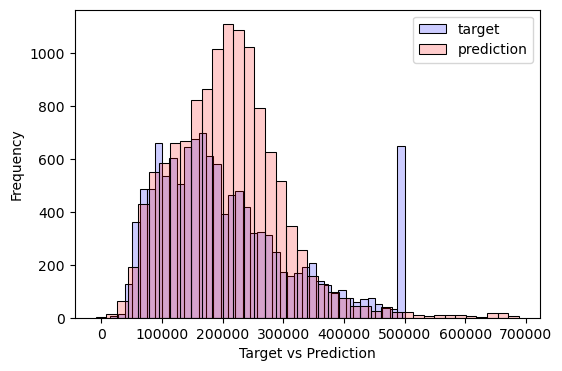

In [86]:
plt.figure(figsize=(6, 4))

sns.histplot(y_train, label='target', color='blue', alpha=0.2, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.2, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Target vs Prediction')


plt.show()

In [87]:
def rmse(y,y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    rmse = float(np.sqrt(mse))
    return rmse 

In [88]:
rmse_ = rmse(y_train,y_pred)
rmse_

73523.48464696352

### Simple Feature Engineer

In [21]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [22]:
df.housing_median_age.max()

52.0

In [89]:
X_train = prepare_X(df_train)

w_0, w = train_linear_regression(X_train,y_train)
y_pred = w_0 + X_train.dot(w)
rmse_train = rmse(y_train,y_pred)
print("rmse train ",rmse_train)

X_val = prepare_X(df_val)

w_0, w = train_linear_regression(X_val,y_val)
y_pred = w_0 + X_val.dot(w)
rmse_val = rmse(y_val,y_pred)
print("rmse validation ",rmse_val)


rmse train  73523.48464696352
rmse validation  4216533.9817814855


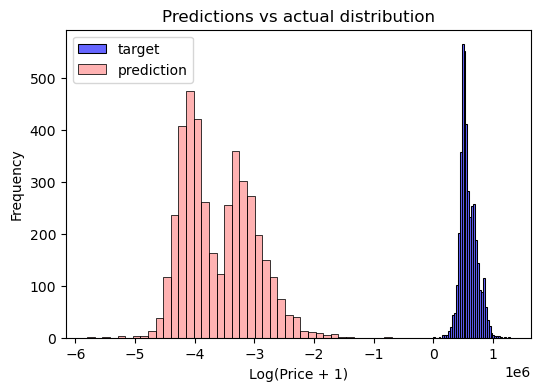

In [90]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='blue', alpha=0.6, bins=40)
sns.histplot(y_pred, label='prediction', color='red', alpha=0.3, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

### Regularization

In [91]:
# we are introducing a new arg r in our previous function
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0]) 
    XTX = XTX + reg # we are adding a number in form of I matrice to the gram matrice XTX

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:] #return new weight vector ( bias term and the rest of weights ) 

In [104]:
X_train = prepare_X_(df_train)
# we are looping here to find the best r value 
for r in [0, 0.001, 0.01, 0.1, 1, 10, 1000, 10000, 100000, 1000000,  10000000,  100000000,  1000000000]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    print('%5s, %.2f, %.2f, %.2f' % (r, w_0, w[6], w[6]))

    0, 284091.41, -198687.42, -198687.42
0.001, 283791.53, -198387.44, -198387.44
 0.01, 281125.99, -195720.95, -195720.95
  0.1, 257403.40, -171990.54, -171990.54
    1, 150659.67, -65242.20, -65242.20
   10, 61465.78, 23449.46, 23449.46
 1000, 25890.67, 24639.96, 24639.96
10000, 9814.10, 6126.40, 6126.40
100000, 4564.27, 1190.34, 1190.34
1000000, 832.92, 173.13, 173.13
10000000, 90.94, 18.40, 18.40
100000000, 9.20, 1.86, 1.86
1000000000, 0.93, 0.19, 0.19


In [109]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=10) # trying with r=0.001

y_pred = w_0 + X_train.dot(w)
print('train', rmse(y_train, y_pred))

train 73632.20779936263
